In [1]:
import pandas as pd
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\anilo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def neural(X_train_scaled):
    model = Sequential()

    # First hidden layer
    model.add(Dense(320, input_dim=X_train_scaled.shape[1], activation='relu'))

    # Dropout for regularization
    model.add(Dropout(0.5))

    # Second hidden layer
    model.add(Dense(64, activation='relu'))

    # Dropout for regularization
    model.add(Dropout(0.5))

    # Third hidden layer
    model.add(Dense(64, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='linear'))

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)


    optimizer = Adam(learning_rate=0.001)


    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])
    model.summary()
    return model


In [3]:
def prepare_data(case,load_type):
    df=pd.read_csv(f'E:\Havelsan\Datasets\{case}_train_sensors.csv', engine='c')
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load=load_type
    df=df[df['SeaTemp']==SeaTemp]
    df=df[df['WindSpeed']==WindSpeed]
    df=df[df['Load']==Load]
    result=df
    result.dropna(inplace=True)
    result.reset_index(drop=True,inplace=True)
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    df_sample=result[abr_sensor_list]
    x_train = df_sample.drop('Z02013', axis = 1) # Features
    y_train = df_sample['Z02013']  # Target
    dft=pd.read_csv(f'E:\Havelsan\Datasets\{case}_test_sensors.csv', engine='c')
    dft=dft[dft['SeaTemp']==SeaTemp]
    dft=dft[dft['WindSpeed']==WindSpeed]
    dft=dft[dft['Load']==Load]
    dft.dropna(inplace=True)
    dft.reset_index(drop=True,inplace=True)
    dft=dft[abr_sensor_list]
    x_test = dft.drop('Z02013', axis = 1) # Features
    y_test = dft['Z02013']  # Target
    return x_train,y_train,x_test,y_test

# M0000_FAU

In [4]:
x_train,y_train,x_test,y_test=prepare_data("M0000",'FAU')

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [6]:
model = neural(X_train_scaled)

Epoch 1/100
1109/1109 [==============================] - 6s 4ms/step - loss: 19.0155 - mse: 19.0155 - val_loss: 60.1987 - val_mse: 60.1987
Epoch 2/100
1109/1109 [==============================] - 4s 4ms/step - loss: 4.1885 - mse: 4.1885 - val_loss: 120.7848 - val_mse: 120.7848
Epoch 3/100
1109/1109 [==============================] - 4s 3ms/step - loss: 2.3612 - mse: 2.3612 - val_loss: 67.0570 - val_mse: 67.0570
Epoch 4/100
1109/1109 [==============================] - 4s 3ms/step - loss: 1.1579 - mse: 1.1579 - val_loss: 23.3786 - val_mse: 23.3786
Epoch 5/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.2433 - mse: 0.2433 - val_loss: 2.3728 - val_mse: 2.3728
Epoch 6/100
1109/1109 [==============================] - 4s 3ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.5114 - val_mse: 0.5114
Epoch 7/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.2466 - val_mse: 0.2466
Epoch 8/100
1109/1109 [====================

In [7]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

675/675 [==============================] - 1s 2ms/step - loss: 0.0015 - mse: 0.0015
Mean squared error from neural net:  0.0014913413906469941
Root Mean squared error from neural net:  0.03861788951570236


# M0000_FAL

In [8]:
x_train,y_train,x_test,y_test=prepare_data("M0000",'FAL')

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [10]:
model = neural(X_train_scaled)

Epoch 1/100
1081/1081 [==============================] - 5s 3ms/step - loss: 23.6032 - mse: 23.6032 - val_loss: 59.1653 - val_mse: 59.1653
Epoch 2/100
1081/1081 [==============================] - 3s 3ms/step - loss: 5.5342 - mse: 5.5342 - val_loss: 115.4760 - val_mse: 115.4760
Epoch 3/100
1081/1081 [==============================] - 3s 3ms/step - loss: 3.1854 - mse: 3.1854 - val_loss: 78.9229 - val_mse: 78.9229
Epoch 4/100
1081/1081 [==============================] - 3s 3ms/step - loss: 1.6957 - mse: 1.6957 - val_loss: 34.3746 - val_mse: 34.3746
Epoch 5/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.4946 - mse: 0.4946 - val_loss: 11.4617 - val_mse: 11.4617
Epoch 6/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.0884 - mse: 0.0884 - val_loss: 1.7044 - val_mse: 1.7044
Epoch 7/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.3734 - val_mse: 0.3734
Epoch 8/100
1081/1081 [==================

In [11]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

730/730 [==============================] - 1s 2ms/step - loss: 0.0018 - mse: 0.0018
Mean squared error from neural net:  0.00179230235517025
Root Mean squared error from neural net:  0.04233559206117531


# M2503_FAU

In [12]:
x_train,y_train,x_test,y_test=prepare_data("M2503",'FAU')

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [14]:
model = neural(X_train_scaled)

Epoch 1/100
1082/1082 [==============================] - 4s 3ms/step - loss: 29.6369 - mse: 29.6369 - val_loss: 59.8339 - val_mse: 59.8339
Epoch 2/100
1082/1082 [==============================] - 3s 3ms/step - loss: 7.4779 - mse: 7.4779 - val_loss: 143.3865 - val_mse: 143.3865
Epoch 3/100
1082/1082 [==============================] - 3s 3ms/step - loss: 4.1419 - mse: 4.1419 - val_loss: 106.6940 - val_mse: 106.6940
Epoch 4/100
1082/1082 [==============================] - 4s 3ms/step - loss: 2.4347 - mse: 2.4347 - val_loss: 59.5537 - val_mse: 59.5537
Epoch 5/100
1082/1082 [==============================] - 3s 3ms/step - loss: 1.1579 - mse: 1.1579 - val_loss: 27.1049 - val_mse: 27.1049
Epoch 6/100
1082/1082 [==============================] - 4s 3ms/step - loss: 0.4874 - mse: 0.4874 - val_loss: 12.5673 - val_mse: 12.5673
Epoch 7/100
1082/1082 [==============================] - 3s 3ms/step - loss: 0.2916 - mse: 0.2916 - val_loss: 9.8017 - val_mse: 9.8017
Epoch 8/100
1082/1082 [==============

In [15]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

689/689 [==============================] - 1s 1ms/step - loss: 0.3979 - mse: 0.3979
Mean squared error from neural net:  0.3978945016860962
Root Mean squared error from neural net:  0.630788793247071


# M2503_FAL

In [16]:
x_train,y_train,x_test,y_test=prepare_data("M2503",'FAL')

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [18]:
model = neural(X_train_scaled)

Epoch 1/100
1090/1090 [==============================] - 4s 3ms/step - loss: 41.0728 - mse: 41.0728 - val_loss: 80.6143 - val_mse: 80.6143
Epoch 2/100
1090/1090 [==============================] - 3s 3ms/step - loss: 9.6006 - mse: 9.6006 - val_loss: 173.3587 - val_mse: 173.3587
Epoch 3/100
1090/1090 [==============================] - 3s 3ms/step - loss: 5.7025 - mse: 5.7025 - val_loss: 151.4244 - val_mse: 151.4244
Epoch 4/100
1090/1090 [==============================] - 3s 3ms/step - loss: 3.8758 - mse: 3.8758 - val_loss: 111.5948 - val_mse: 111.5948
Epoch 5/100
1090/1090 [==============================] - 3s 3ms/step - loss: 2.2095 - mse: 2.2095 - val_loss: 77.4966 - val_mse: 77.4966
Epoch 6/100
1090/1090 [==============================] - 3s 3ms/step - loss: 1.0996 - mse: 1.0996 - val_loss: 48.3410 - val_mse: 48.3410
Epoch 7/100
1090/1090 [==============================] - 3s 3ms/step - loss: 0.7025 - mse: 0.7025 - val_loss: 36.4045 - val_mse: 36.4045
Epoch 8/100
1090/1090 [==========

In [19]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

702/702 [==============================] - 1s 1ms/step - loss: 0.7665 - mse: 0.7665
Mean squared error from neural net:  0.7664937376976013
Root Mean squared error from neural net:  0.8754962808016955


#  M2508_FAU

In [20]:
x_train,y_train,x_test,y_test=prepare_data("M2508",'FAU')

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [22]:
model = neural(X_train_scaled)

Epoch 1/100
851/851 [==============================] - 3s 3ms/step - loss: 22.2533 - mse: 22.2533 - val_loss: 27.9438 - val_mse: 27.9438
Epoch 2/100
851/851 [==============================] - 2s 3ms/step - loss: 5.7550 - mse: 5.7550 - val_loss: 94.5677 - val_mse: 94.5677
Epoch 3/100
851/851 [==============================] - 2s 3ms/step - loss: 3.4561 - mse: 3.4561 - val_loss: 86.9856 - val_mse: 86.9856
Epoch 4/100
851/851 [==============================] - 2s 3ms/step - loss: 2.3129 - mse: 2.3129 - val_loss: 70.8772 - val_mse: 70.8772
Epoch 5/100
851/851 [==============================] - 2s 3ms/step - loss: 1.4339 - mse: 1.4339 - val_loss: 47.8934 - val_mse: 47.8934
Epoch 6/100
851/851 [==============================] - 3s 3ms/step - loss: 0.8399 - mse: 0.8399 - val_loss: 23.4205 - val_mse: 23.4205
Epoch 7/100
851/851 [==============================] - 2s 3ms/step - loss: 0.5352 - mse: 0.5352 - val_loss: 6.4404 - val_mse: 6.4404
Epoch 8/100
851/851 [==============================] - 

In [23]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

620/620 [==============================] - 1s 2ms/step - loss: 0.2715 - mse: 0.2715
Mean squared error from neural net:  0.27147170901298523
Root Mean squared error from neural net:  0.5210294703881779


# M2508_FAL

In [24]:
x_train,y_train,x_test,y_test=prepare_data("M2508",'FAL')

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [26]:
model = neural(X_train_scaled)

Epoch 1/100
1026/1026 [==============================] - 5s 3ms/step - loss: 27.9128 - mse: 27.9128 - val_loss: 14.5046 - val_mse: 14.5046
Epoch 2/100
1026/1026 [==============================] - 3s 3ms/step - loss: 7.6462 - mse: 7.6462 - val_loss: 83.8093 - val_mse: 83.8093
Epoch 3/100
1026/1026 [==============================] - 3s 3ms/step - loss: 4.3939 - mse: 4.3939 - val_loss: 83.8648 - val_mse: 83.8648
Epoch 4/100
1026/1026 [==============================] - 3s 3ms/step - loss: 2.9360 - mse: 2.9360 - val_loss: 76.3595 - val_mse: 76.3595
Epoch 5/100
1026/1026 [==============================] - 3s 3ms/step - loss: 1.7914 - mse: 1.7914 - val_loss: 62.0691 - val_mse: 62.0691
Epoch 6/100
1026/1026 [==============================] - 3s 3ms/step - loss: 0.9174 - mse: 0.9174 - val_loss: 42.6047 - val_mse: 42.6047
Epoch 7/100
1026/1026 [==============================] - 3s 3ms/step - loss: 0.4355 - mse: 0.4355 - val_loss: 17.3978 - val_mse: 17.3978
Epoch 8/100
1026/1026 [================

In [27]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

648/648 [==============================] - 1s 1ms/step - loss: 0.2798 - mse: 0.2798
Mean squared error from neural net:  0.27978140115737915
Root Mean squared error from neural net:  0.5289436653911068


#  ALL_FAU

In [28]:
df1=pd.read_csv(r'E:\Havelsan\Datasets\M2508_train_sensors.csv', engine='c')
df2=pd.read_csv(r'E:\Havelsan\Datasets\M2503_train_sensors.csv', engine='c')
df3=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df = pd.concat([df1,df2,df3], axis=0)
SeaTemp='SW20'
WindSpeed='WC0'
Load='FAU'
df=df[df['SeaTemp']==SeaTemp]
df=df[df['WindSpeed']==WindSpeed]
df=df[df['Load']==Load]
result=df
result.dropna(inplace=True)
result.reset_index(drop=True,inplace=True)
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_sample=result[abr_sensor_list]
x_train = df_sample.drop('Z02013', axis = 1) # Features
y_train = df_sample['Z02013']  # Target

In [29]:
dft1=pd.read_csv(r'E:\Havelsan\Datasets\M2508_test_sensors.csv', engine='c')
dft2=pd.read_csv(r'E:\Havelsan\Datasets\M2503_test_sensors.csv', engine='c')
dft3=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft = pd.concat([dft1,dft2,dft3], axis=0)
dft=dft[dft['SeaTemp']==SeaTemp]
dft=dft[dft['WindSpeed']==WindSpeed]
dft=dft[dft['Load']==Load]
dft.dropna(inplace=True)
dft.reset_index(drop=True,inplace=True)
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
dft=dft[abr_sensor_list]
x_test = dft.drop('Z02013', axis = 1) # Features
y_test = dft['Z02013']  # Target

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [31]:
model = neural(X_train_scaled)

Epoch 1/100
3041/3041 [==============================] - 11s 3ms/step - loss: 11.9918 - mse: 11.9918 - val_loss: 68.0325 - val_mse: 68.0325
Epoch 2/100
3041/3041 [==============================] - 9s 3ms/step - loss: 1.4878 - mse: 1.4878 - val_loss: 5.2263 - val_mse: 5.2263
Epoch 3/100
3041/3041 [==============================] - 9s 3ms/step - loss: 0.4025 - mse: 0.4025 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4/100
3041/3041 [==============================] - 9s 3ms/step - loss: 0.2662 - mse: 0.2662 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 5/100
3041/3041 [==============================] - 9s 3ms/step - loss: 0.2178 - mse: 0.2178 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 6/100
3041/3041 [==============================] - 10s 3ms/step - loss: 0.2328 - mse: 0.2328 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 7/100
3041/3041 [==============================] - 9s 3ms/step - loss: 0.2243 - mse: 0.2243 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 8/100
3041/3041 [==========================

In [32]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

1984/1984 [==============================] - 4s 2ms/step - loss: 0.8472 - mse: 0.8472
Mean squared error from neural net:  0.847174346446991
Root Mean squared error from neural net:  0.9204207442506883


#  ALL_FAL

In [33]:
df1=pd.read_csv(r'E:\Havelsan\Datasets\M2508_train_sensors.csv', engine='c')
df2=pd.read_csv(r'E:\Havelsan\Datasets\M2503_train_sensors.csv', engine='c')
df3=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df = pd.concat([df1,df2,df3], axis=0)
SeaTemp='SW20'
WindSpeed='WC0'
Load='FAL'
df=df[df['SeaTemp']==SeaTemp]
df=df[df['WindSpeed']==WindSpeed]
df=df[df['Load']==Load]
result=df
result.dropna(inplace=True)
result.reset_index(drop=True,inplace=True)
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_sample=result[abr_sensor_list]
x_train = df_sample.drop('Z02013', axis = 1) # Features
y_train = df_sample['Z02013']  # Target

In [34]:
dft1=pd.read_csv(r'E:\Havelsan\Datasets\M2508_test_sensors.csv', engine='c')
dft2=pd.read_csv(r'E:\Havelsan\Datasets\M2503_test_sensors.csv', engine='c')
dft3=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft = pd.concat([dft1,dft2,dft3], axis=0)
dft=dft[dft['SeaTemp']==SeaTemp]
dft=dft[dft['WindSpeed']==WindSpeed]
dft=dft[dft['Load']==Load]
dft.dropna(inplace=True)
dft.reset_index(drop=True,inplace=True)
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
dft=dft[abr_sensor_list]
x_test = dft.drop('Z02013', axis = 1) # Features
y_test = dft['Z02013']  # Target

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [36]:
model = neural(X_train_scaled)

Epoch 1/100
3196/3196 [==============================] - 11s 3ms/step - loss: 15.4427 - mse: 15.4427 - val_loss: 92.2418 - val_mse: 92.2418
Epoch 2/100
3196/3196 [==============================] - 10s 3ms/step - loss: 2.5959 - mse: 2.5959 - val_loss: 35.6218 - val_mse: 35.6218
Epoch 3/100
3196/3196 [==============================] - 11s 3ms/step - loss: 0.7965 - mse: 0.7965 - val_loss: 4.7690 - val_mse: 4.7690
Epoch 4/100
3196/3196 [==============================] - 10s 3ms/step - loss: 0.4025 - mse: 0.4025 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 5/100
3196/3196 [==============================] - 11s 3ms/step - loss: 0.3170 - mse: 0.3170 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 6/100
3196/3196 [==============================] - 10s 3ms/step - loss: 0.2701 - mse: 0.2701 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 7/100
3196/3196 [==============================] - 10s 3ms/step - loss: 0.2239 - mse: 0.2239 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 8/100
3196/3196 [===================

In [37]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

2079/2079 [==============================] - 4s 2ms/step - loss: 1.0598 - mse: 1.0598
Mean squared error from neural net:  1.0598435401916504
Root Mean squared error from neural net:  1.0294870276946915


# Comparing


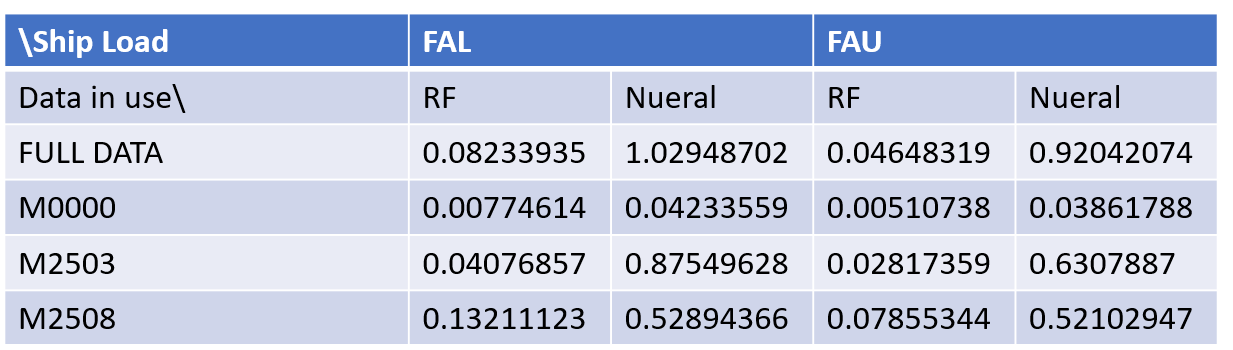